<a href="https://colab.research.google.com/github/spingram/MAT421-sam/blob/main/Numerical_Derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 Write a function my_num_diff(f,a,b,n,option)
, with the output as [df,X]
, where f
 is a function object. The function my_num_diff
 should compute the derivative of f
 numerical for n
 evenly spaced points starting at a
 and ending at b
 according to the method defined by option
. The input argument option
 is one of the following strings: ‘forward’, ‘backward’, ‘central’. Note that for the forward and backward method, the output argument, dy
, should be (n−1)
 1D array, and for the central difference method dy
 should be (n−2)
 1D array. The function should also output a vector X
 that is the same size as dy
 and denotes the x-values for which dy
 is valid.

In [4]:
import numpy as np

def my_num_diff(f, a, b, n, option):
    step = (b - a) / n
    x = [a + i * step for i in range(n + 1)]
    y = f(x)
    if option == "forward":
        df = np.zeros(len(x) - 1)
        X = np.zeros(len(x) - 1)
        for i in range(len(x) - 1):
            df[i] = (f(x[i + 1]) - f(x[i])) / (x[i + 1] - x[i])
            X[i] = x[i]
    elif option == "backward":
        df = np.zeros(len(x) - 1)
        X = np.zeros(len(x) - 1)
        for i in range(len(x) - 1):
            df[i] = (f(x[i + 1]) - f(x[i])) / (x[i + 1] - x[i])
            X[i] = x[i + 1]
    else:
        df = np.zeros(len(x) - 2)
        X = np.zeros(len(x) - 2)
        for i in range(len(x) - 2):
            df[i] = (f(x[i + 2]) - f(x[i])) / (x[i + 2] - x[i])
            X[i] = x[i + 1]

    return [df, X]




Test Cases from book:

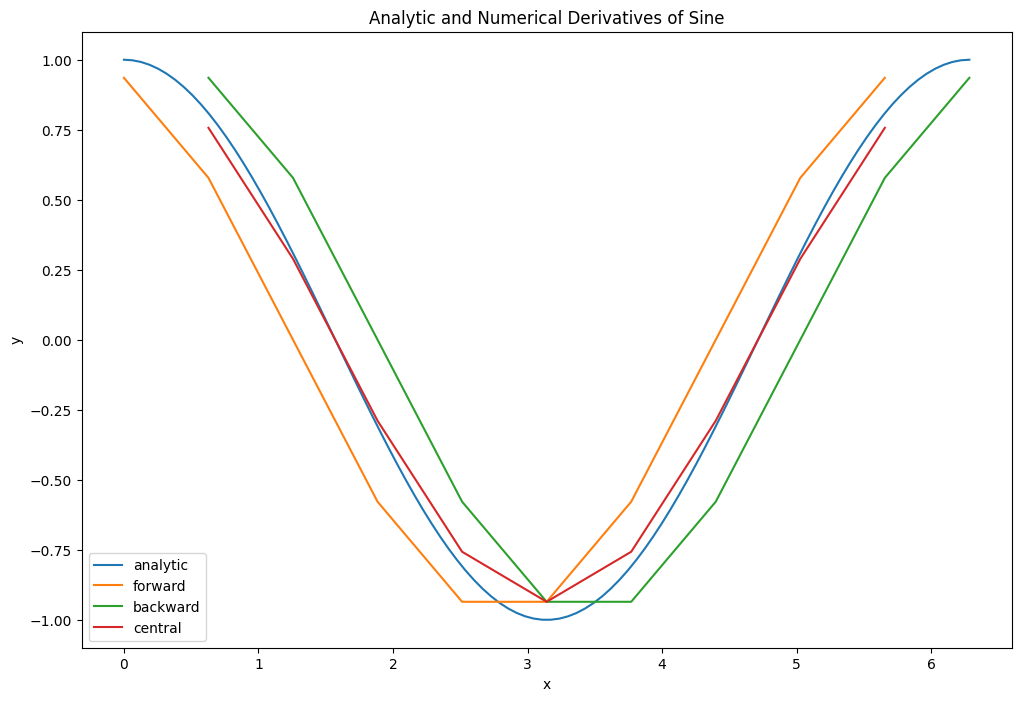

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)
[dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

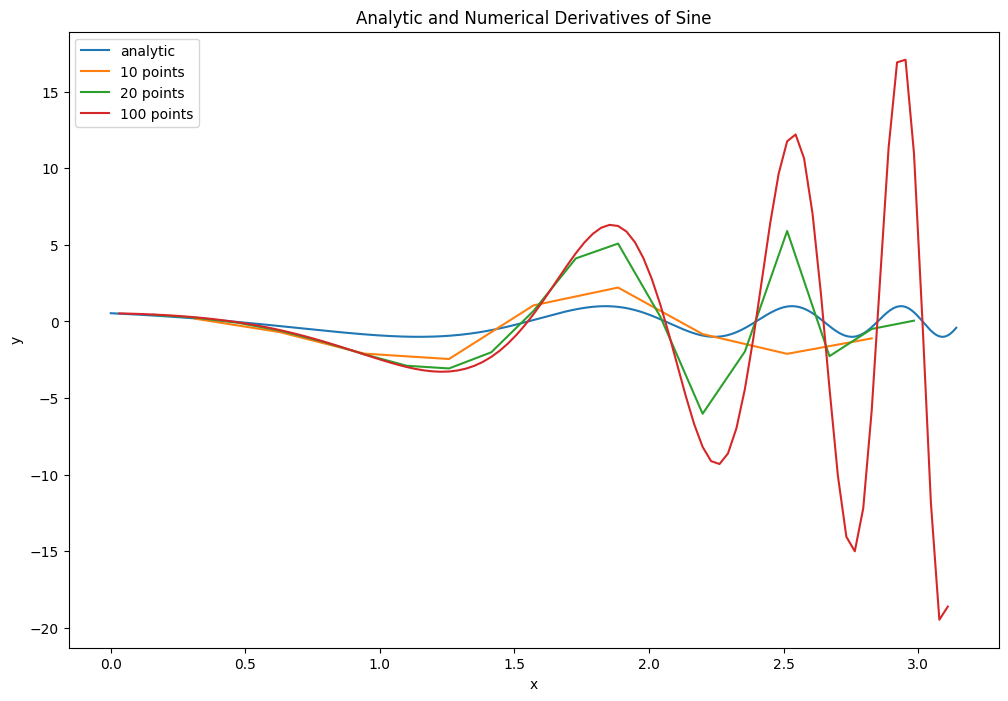

In [6]:
x = np.linspace(0, np.pi, 1000)
f = lambda x: np.sin(np.exp(x))
[dy10, X10] = my_num_diff(f, 0, np.pi, 10, 'central')
[dy20, X20] = my_num_diff(f, 0, np.pi, 20, 'central')
[dy100, X100] = my_num_diff(f, 0, np.pi, 100, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(np.exp(x)), label = 'analytic')
plt.plot(X10, dy10, label = '10 points')
plt.plot(X20, dy20, label = '20 points')
plt.plot(X100, dy100, label = '100 points')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Write a function my_num_diff_w_smoothing(x,y,n)
, with the output [dy,X],
where x
 and y
 are 1D numpy array of the same length, and n
 is a strictly positive scalar. The function should first create a vector of “smoothed” y
 data points where y_smooth[i]=np.mean(y[i−n:i+n])
. The function should then compute dy
, the derivative of the smoothed y
-vector using the central difference method. The function should also output a 1D array X
 that is the same size as dy
 and denotes the x-values for which dy
 is valid.

In [16]:
import numpy as np

def my_num_diff_w_smoothing(x,y,n):
  y_smooth = [np.mean(y[i-n:i+n]) for i in range(n,len(y)-n)]
  x = [x[i] for i in range(n,len(y)-n)]
  y = [y[i] for i in range(n,len(y)-n)]
  dy = np.zeros(len(x) - 2)
  X = np.zeros(len(x) - 2)
  for i in range(len(x) - 2):
      dy[i] = (y_smooth[i + 2] - y_smooth[i]) / (x[i + 2] - x[i])
      X[i] = x[i + 1]
  return[dy,X]


Test Cases from book

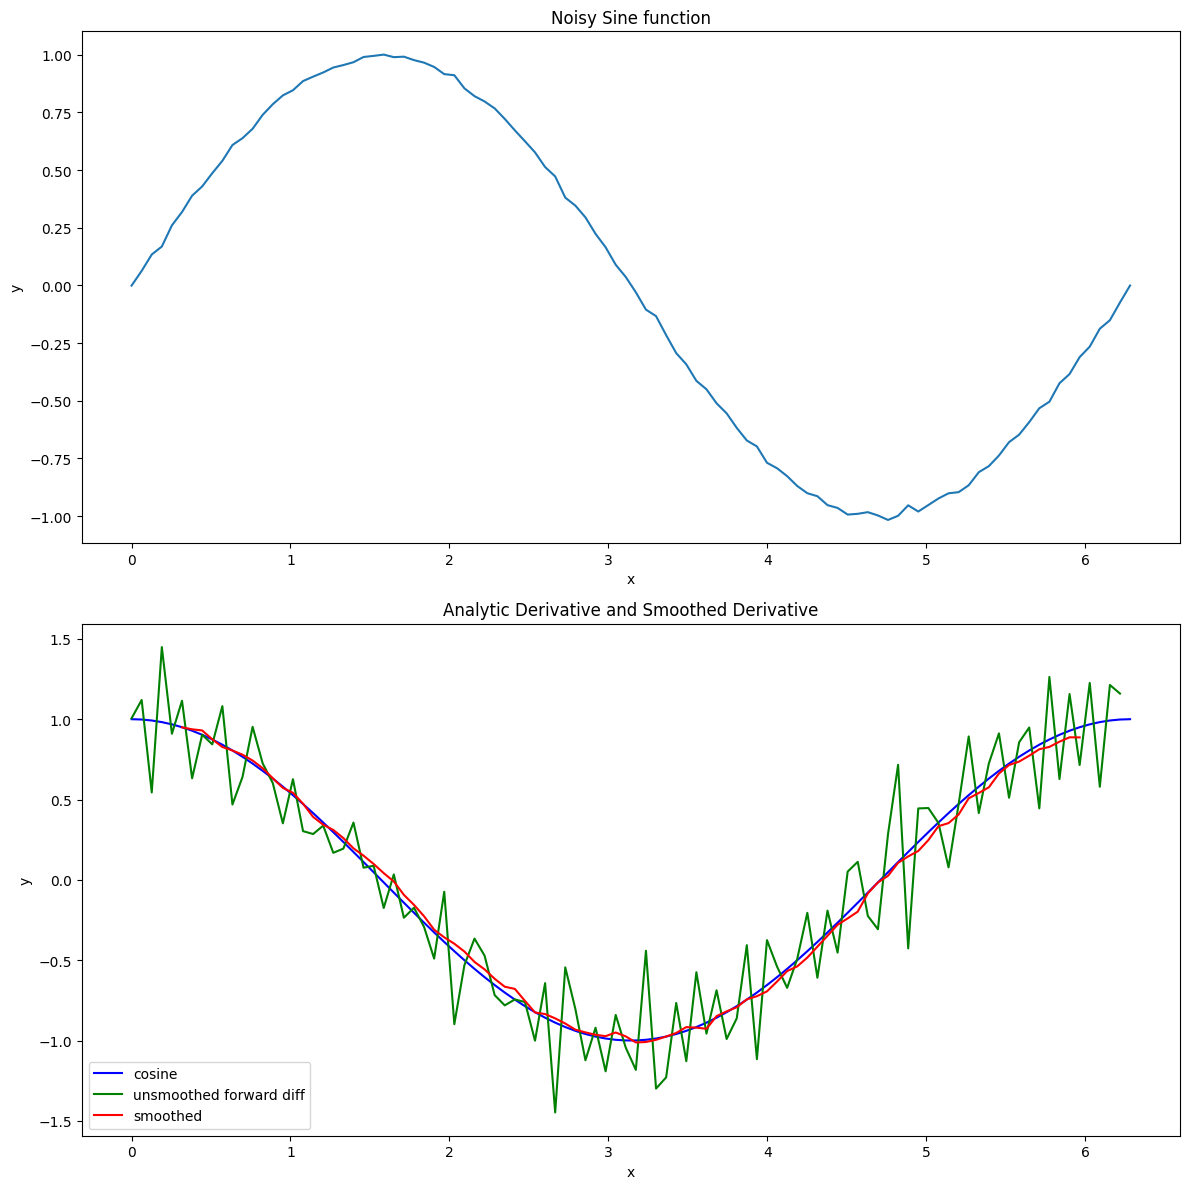

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()
